# Musical note analysis
M C M Wright, ISVR, University of Southampton

In this series of notebooks we will important samples of notes played on orchestral instruments, and analyse them to see how their characteristics vary with pitch and volume, and between instruments.

The samples we'll be using can be downloaded from the [Philharmonia Orchestra's website](http://www.philharmonia.co.uk/explore/make_music). In this notebook we'll download just one sampled note; in future notebooks we'll work with directories of notes.

We begin, as usual, by importing the libraries we'll need:

In [1]:
%pylab inline
import os
import urllib
from scipy.io import wavfile

Populating the interactive namespace from numpy and matplotlib


Next we'll download a 0.5 second sample of a flute playing the note A4 
*forte* and store it in a local file `flute.mp3`.

In [2]:
urllib.urlretrieve ("http://www.philharmonia.co.uk/assets/audio/samples/flute/flute_A4_05_forte_normal.mp3", "flute.mp3")

('flute.mp3', <httplib.HTTPMessage instance at 0x000000000B201348>)

Check the file is now present in the same folder as this notebook.

We can't import `.mp3` files directly into Python. Instead we use the `ffmpeg` utility to convert it into a temporary `.wav` file, import its sample values into `x` and its sampling frequency into `Fs`, and then delete it. The `.wav` file takes more memory than the `.mp3` file which is compressed. Because it's a lossy compression process we can't expect the waveform we import to be exactly what was recorded, but it will be close enough for our purposes.

In [3]:
os.system('ffmpeg -i flute.mp3 temp.wav')
Fs, x = wavfile.read('temp.wav')
os.system('del temp.wav')

0

In [11]:
len(x)*1.0/Fs

0.809795918367347

We can plot the samples to see the data.

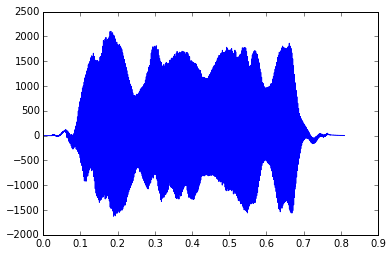

In [12]:
t = arange(len(x))*1.0/Fs    # Fs is an int
plot(t, x)

Because we know the frequency that corresponds to A4 is 440 Hz we can extract whole numbers of periods and plot them. Here's a plot of three periods starting at the 10,000th sample.

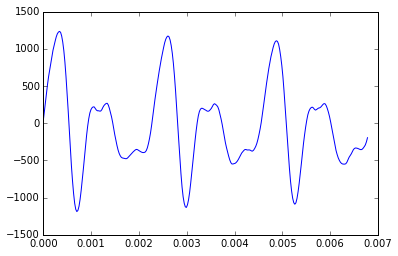

In [16]:
f = 440
T = 1.0/f
dt = 1.0/Fs
plot(t[0:3*T/dt], x[10000:(10000 + 3*T/dt)])

Listening to the sample reveals that the sound changes during the course of the note, so we should expect the waveform to change too. The following code cell takes five points in the sample and plots a period of the waveform for each starting point, starting at a peak. Run this cell a few times to explore what variety of waveforms there are within the note.

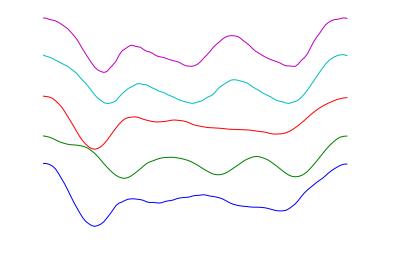

In [20]:
t_start = random.uniform(low = 0.1, high = 0.6, size = 5)
ind = arange(T*Fs, dtype = int)

for (n, t_s) in enumerate(t_start):
    rel_ind = int(t_s*Fs)
    plot(t[ind1], x[rel_ind + argmax(x[rel_ind + ind]) + ind] + 2000*n)
    axis('off')

To be continued...